In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [13]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol   DI55102   DI55152  \
0            0.867508    0.670721     3.354160  30.3662  0.965043  0.924515   
1            0.864729    0.671059     3.306475  30.3662  0.965043  0.924515   
2            0.856391    0.672071     3.163420  30.6785  0.965043  0.924515   
3            0.811652    0.674174     2.238130  32.6454  0.971625  0.933431   
4            0.773793    0.675408     1.391475  32.6454  0.971625  0.933431   

    DI55580   FC55003   FC55552   FC55

### Include

In [14]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [15]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [16]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date',
            #      'C4_pct_Hex', 'HydWtr_Na2O',
            #       # No improvement after dropping:
            #      'TC55555'
            #    #   MSE Train	RMSE Train	R2 Train	MSE Test	RMSE Test	R2 Test
            #    #   7.935280	2.8169630	0.90869	12.1856	3.490801	   0.8677



                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [17]:
df_All.columns

Index(['425_pct_Al', 'Al2O3', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102',
       'DI55152', 'DI55580', 'FC55003', 'FC55552', 'FC55569', 'FC55576',
       'FFC55553', 'FFC55555', 'LC52572', 'LC55553', 'LC55557', 'LC55568',
       'LC90366', 'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553',
       'TC55555', 'TI40050', 'TI55021', 'TI55023'],
      dtype='object')

In [18]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [19]:
# df_All.drop('Date', axis=1, inplace=True)

In [20]:
print(df_All.describe())

         425_pct_Al         Al2O3       M_Value    C4_pct_Eth    C4_pct_H2O  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       6.133716     11.382607      3.597077      1.213887     21.178645   
std        0.228800      0.547831      0.179868      0.691779      2.750323   
min        5.270185      9.740945      1.255950      0.030786      7.714985   
25%        6.003510     11.095875      3.502715      0.621701     18.843125   
50%        6.135865     11.495850      3.588030      1.103350     21.462900   
75%        6.265830     11.719825      3.682920      1.687807     23.275925   
max        7.026215     12.879900      5.827565      9.466675     34.151950   

       HydWtr_pct_Ammonia    C4_pct_Hex   HydWtr_Na2O       Butanol  \
count        40127.000000  40127.000000  40127.000000  40127.000000   
mean             0.967938      0.471411      0.789919      9.218873   
std              0.146452      0.241196      0.686560      8.828021   
min 

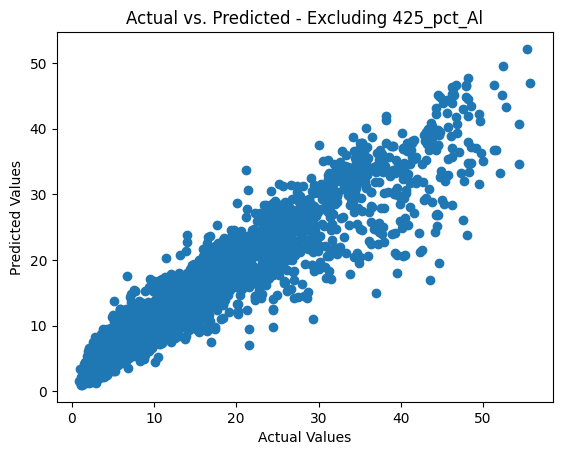

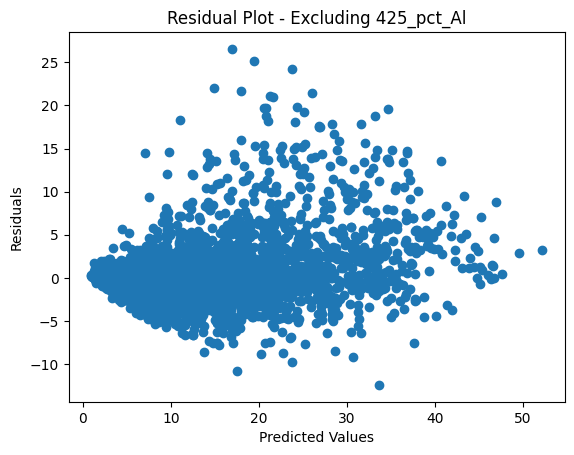

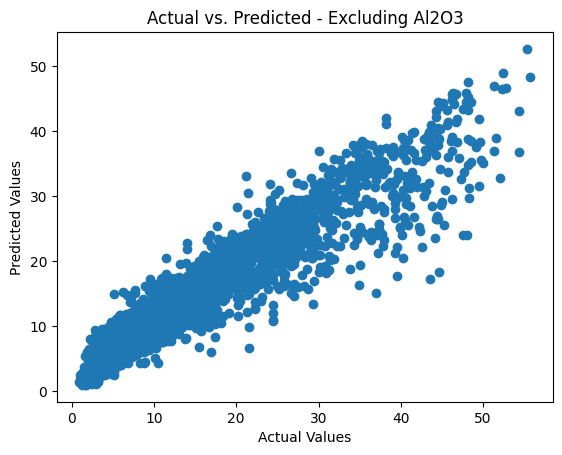

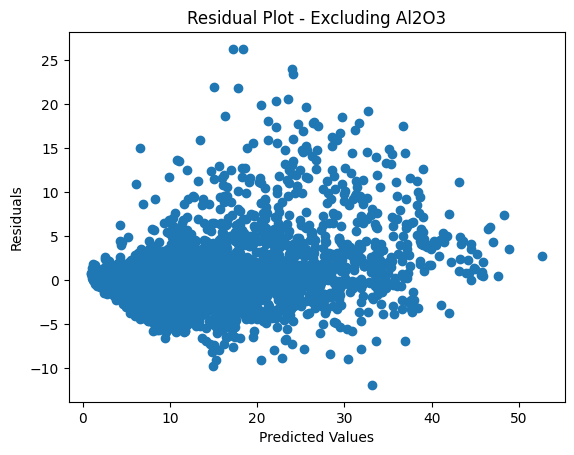

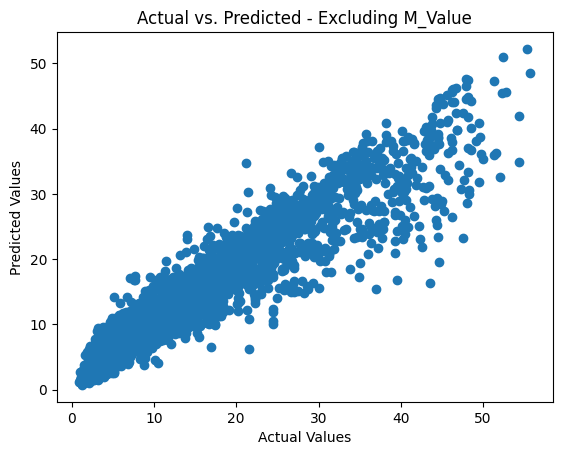

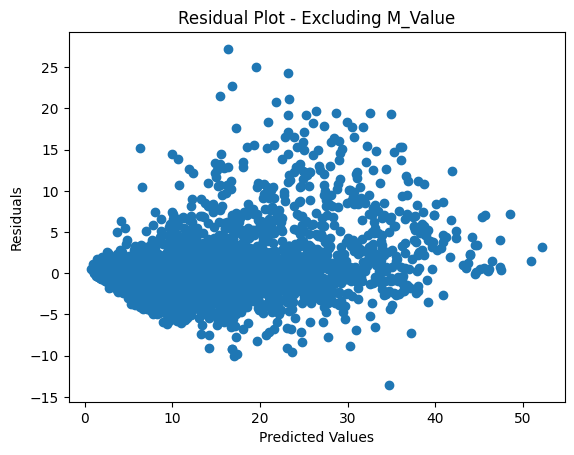

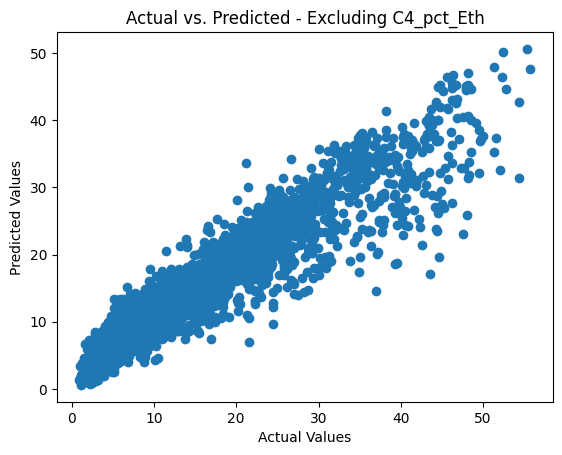

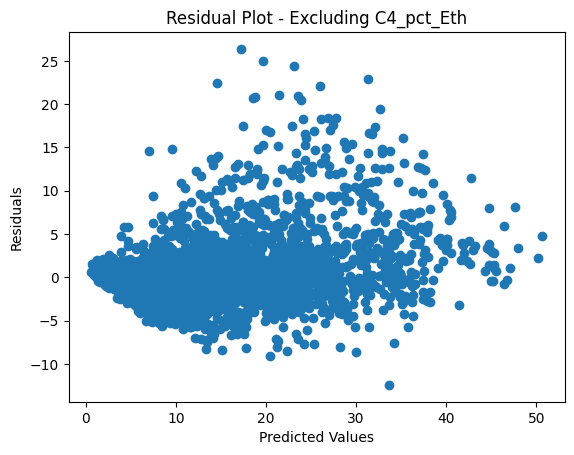

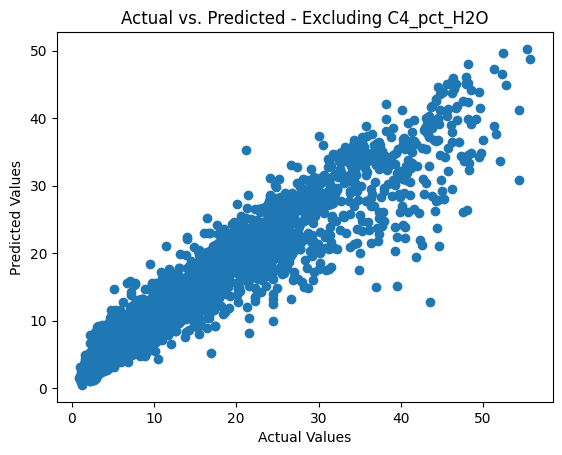

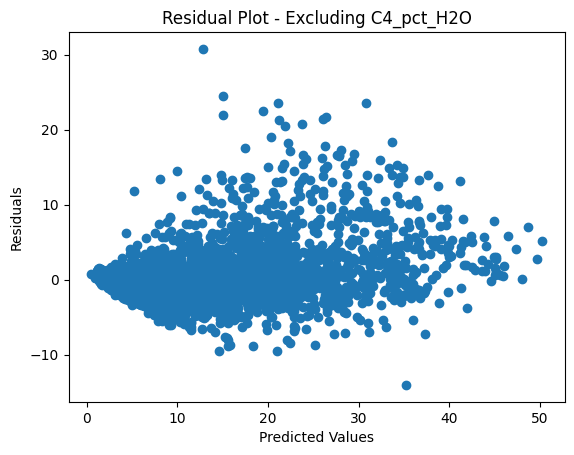

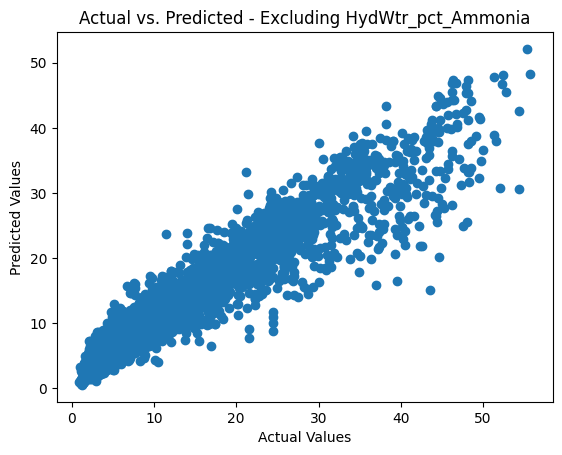

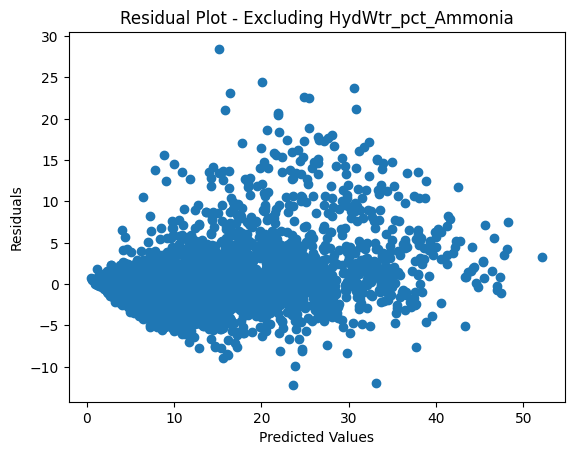

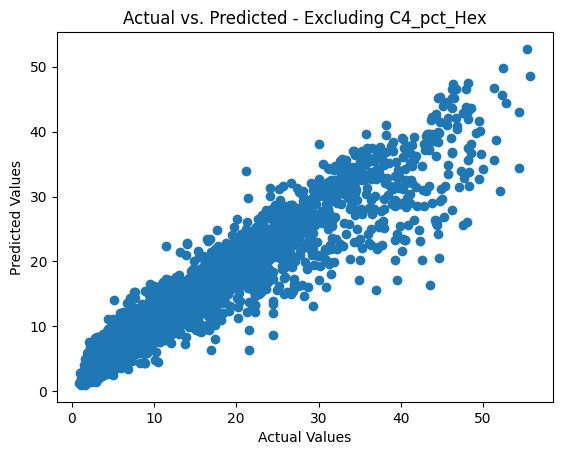

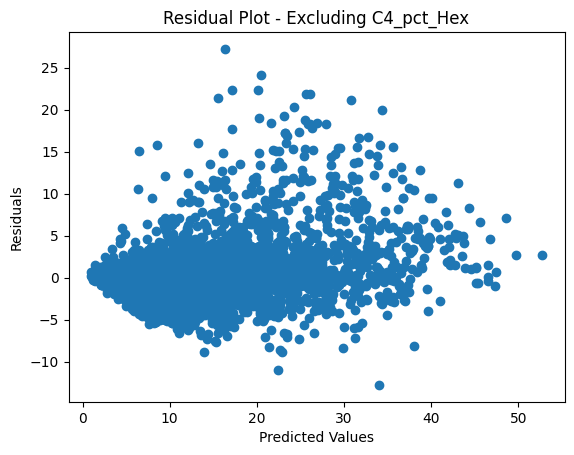

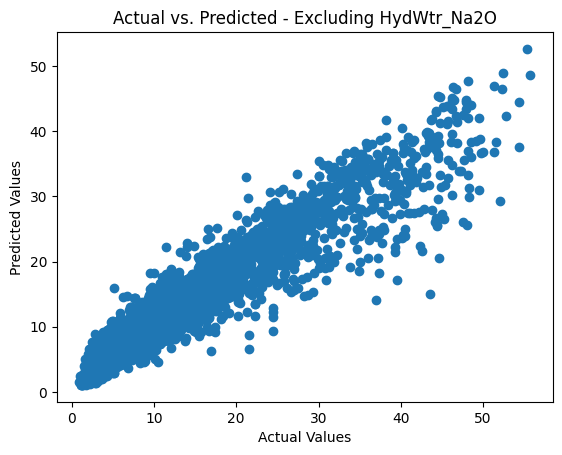

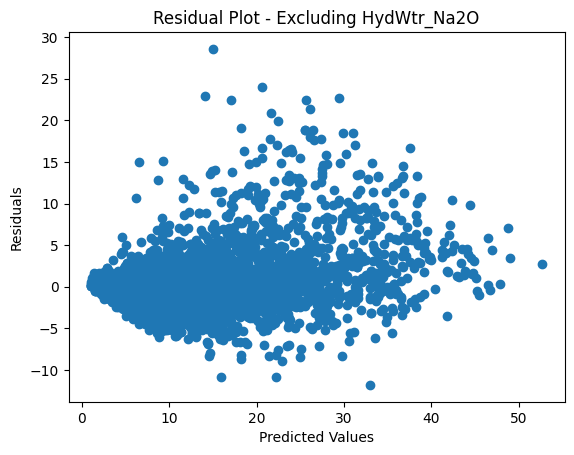

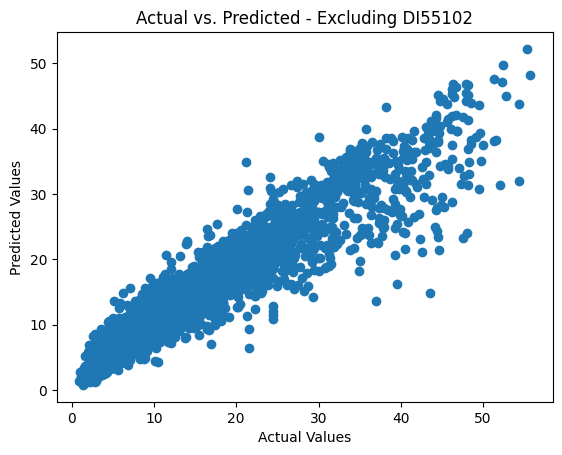

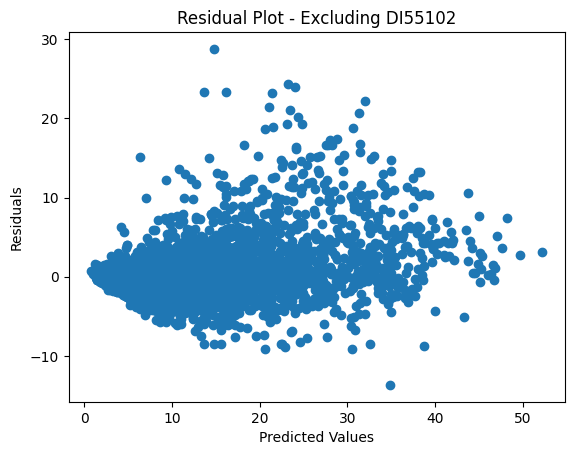

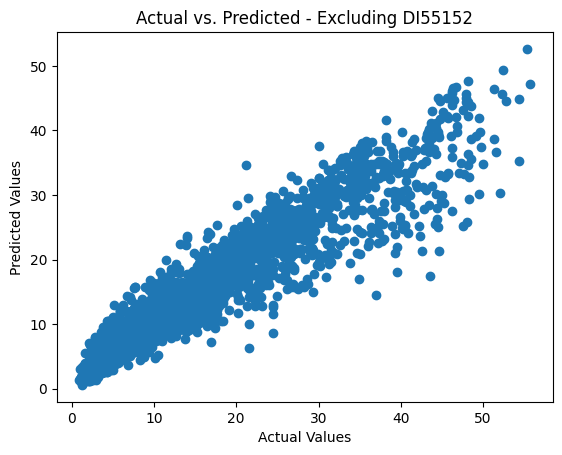

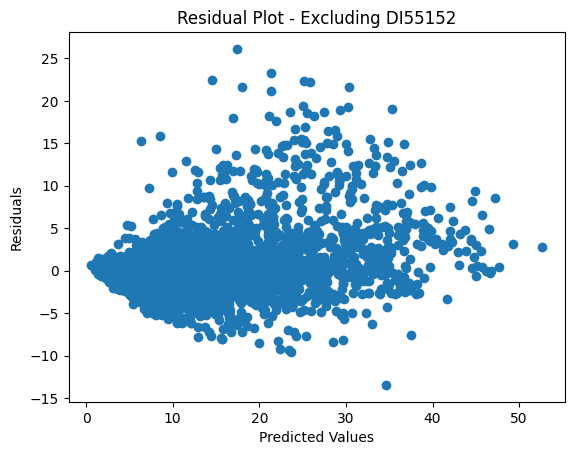

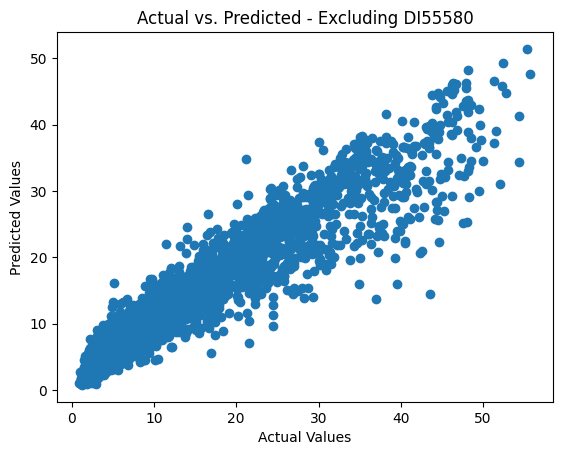

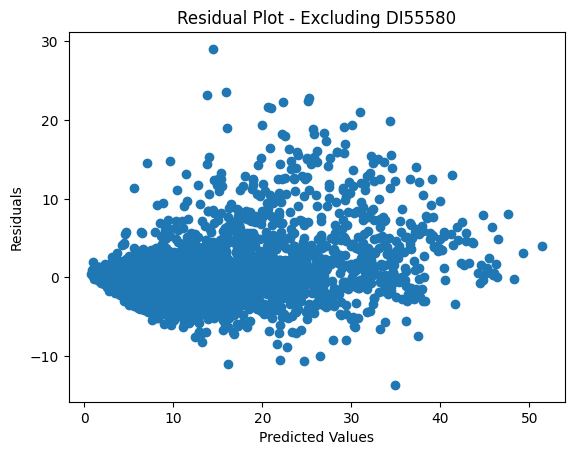

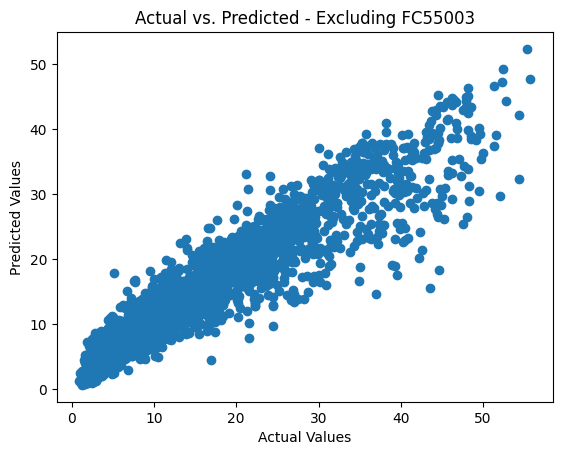

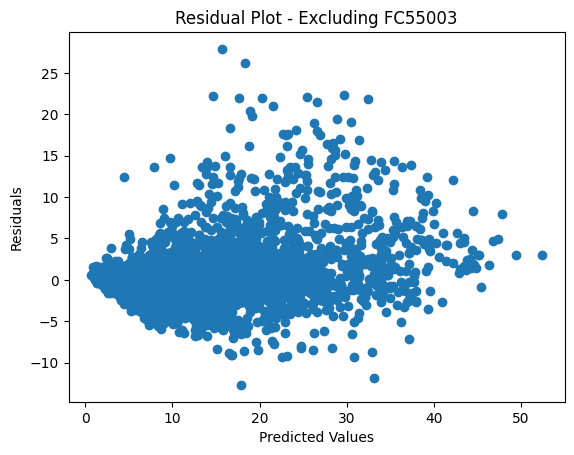

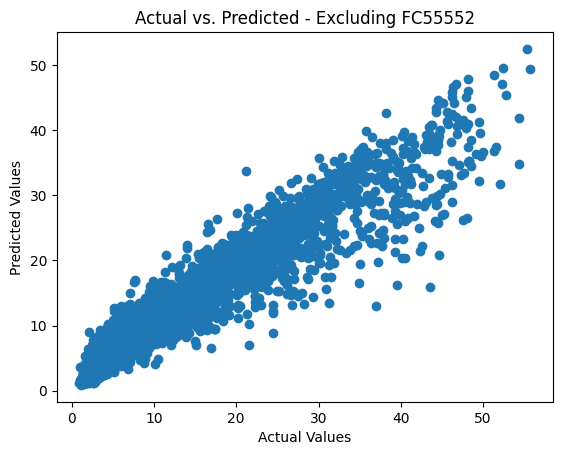

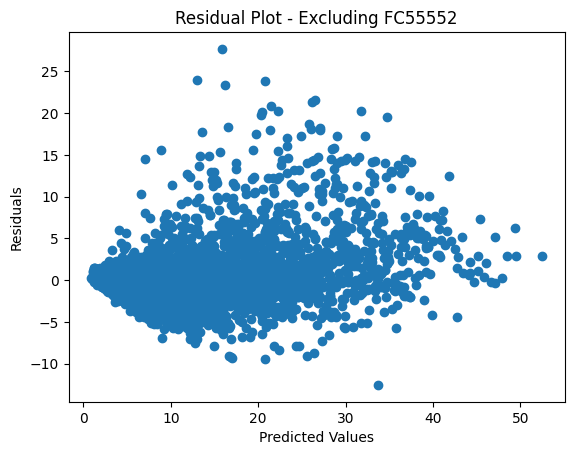

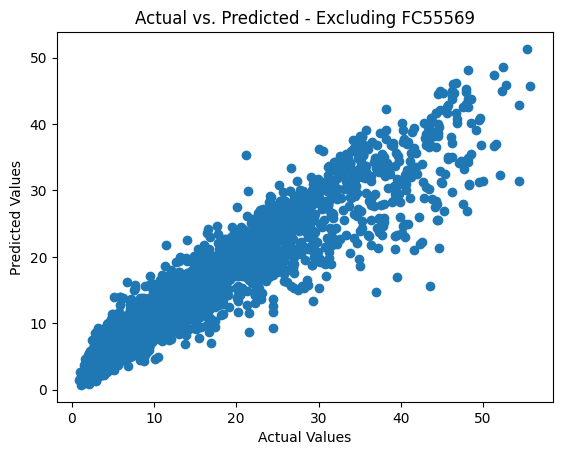

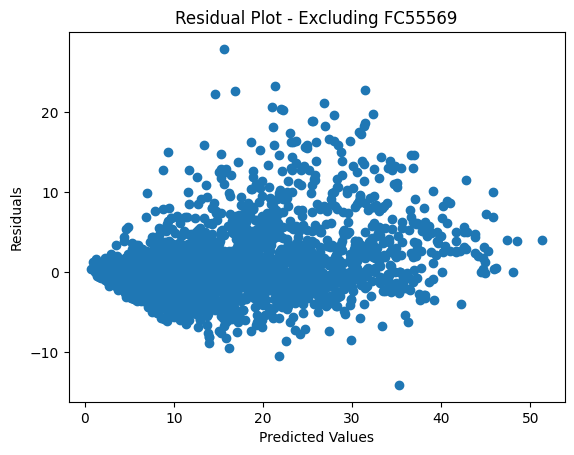

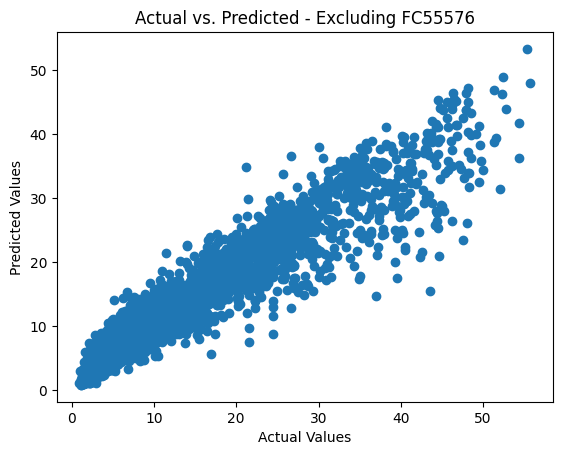

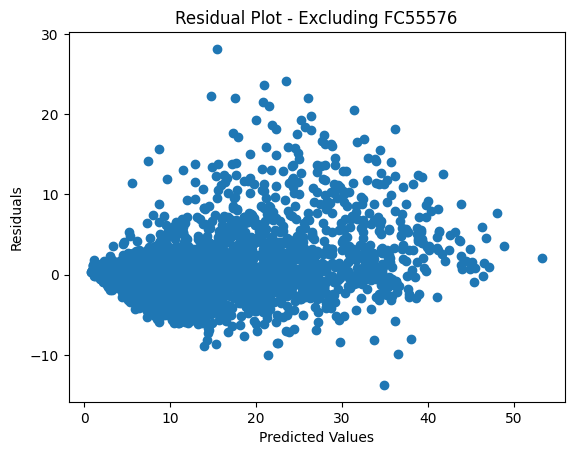

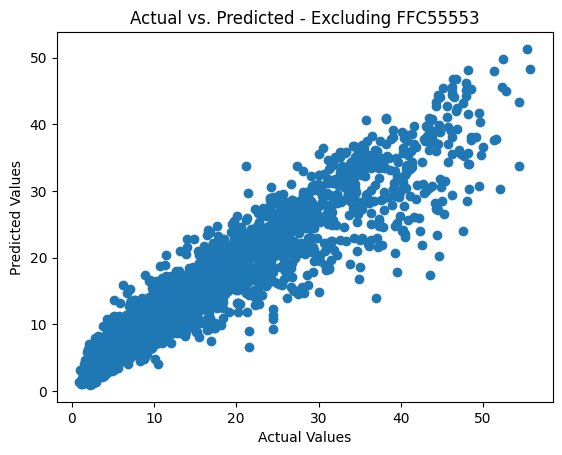

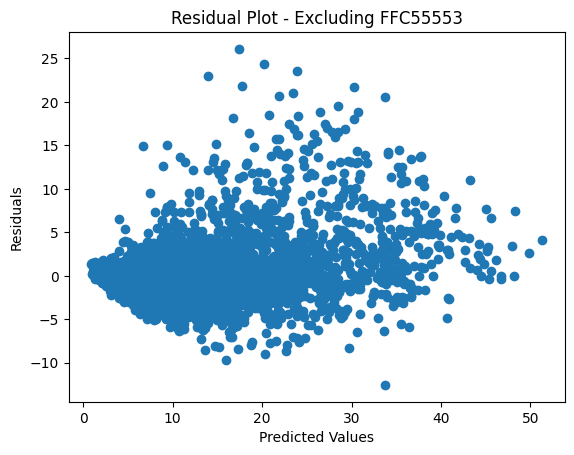

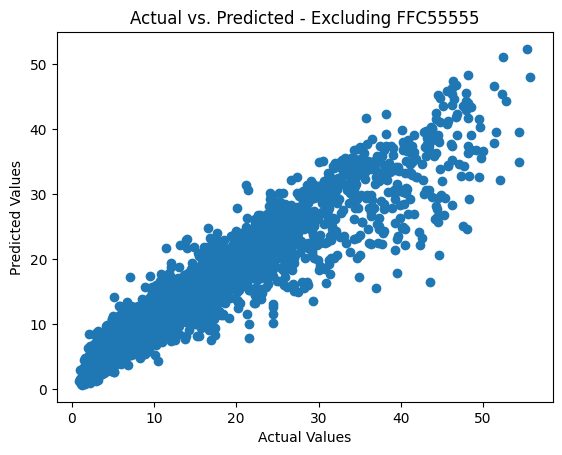

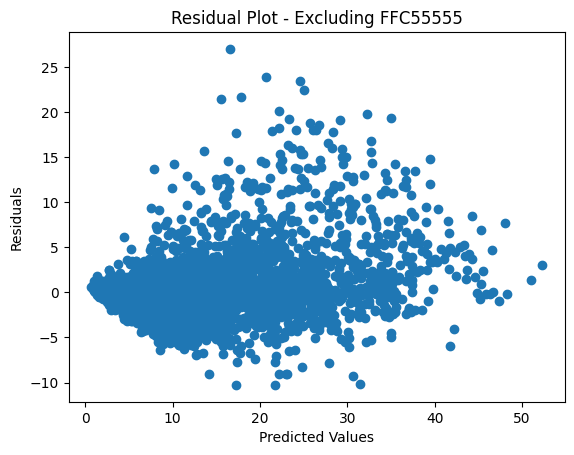

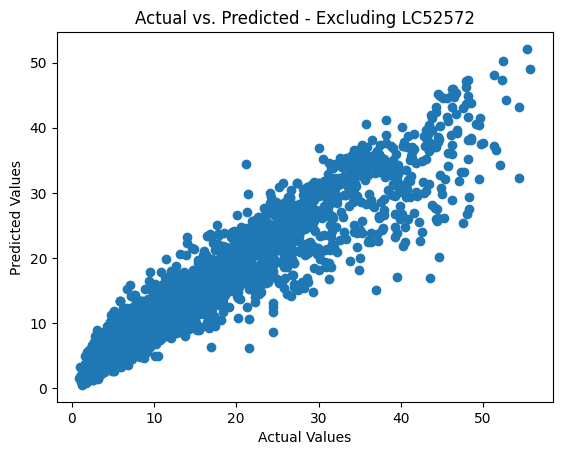

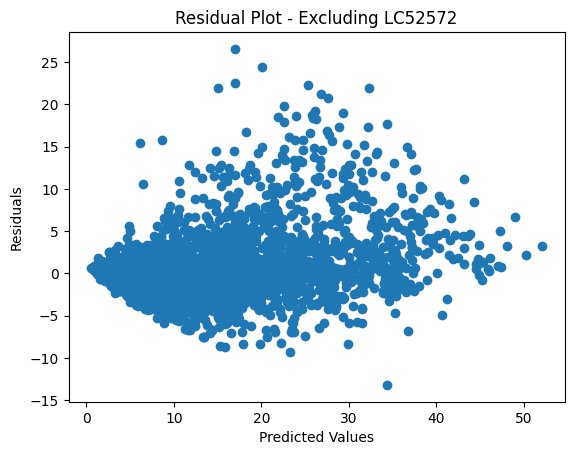

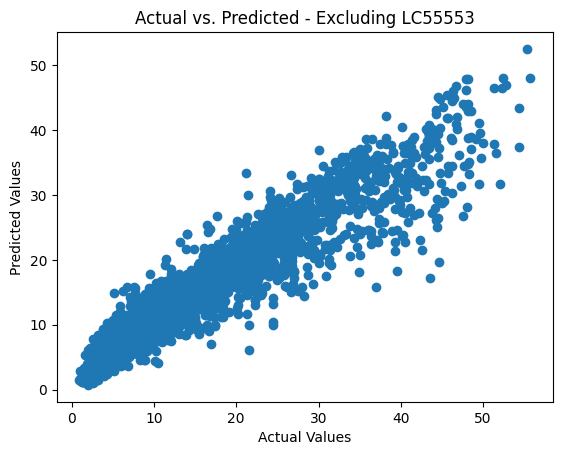

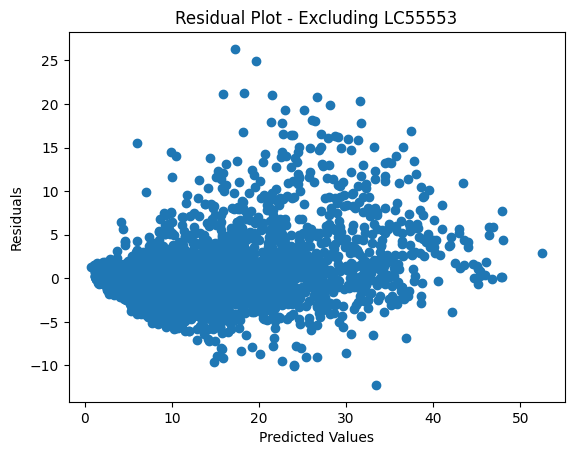

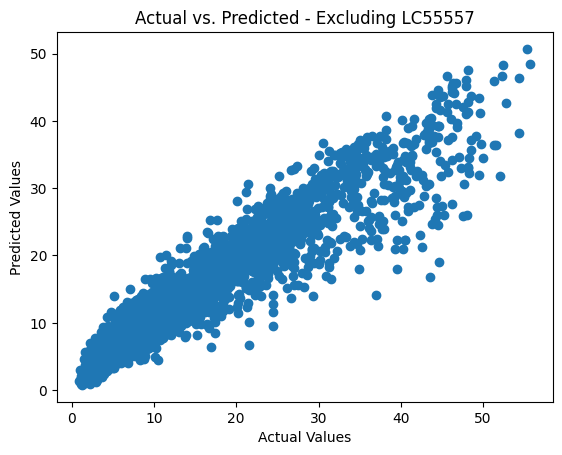

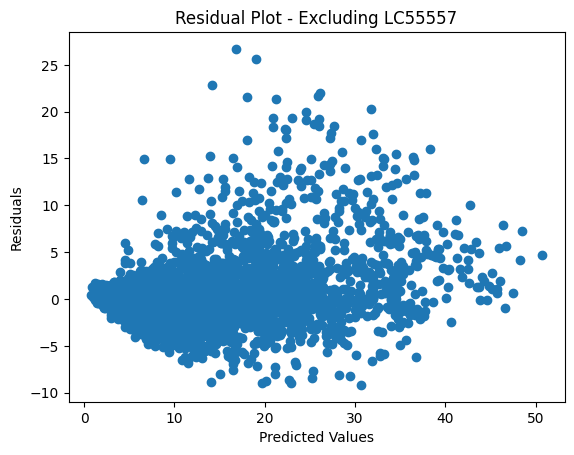

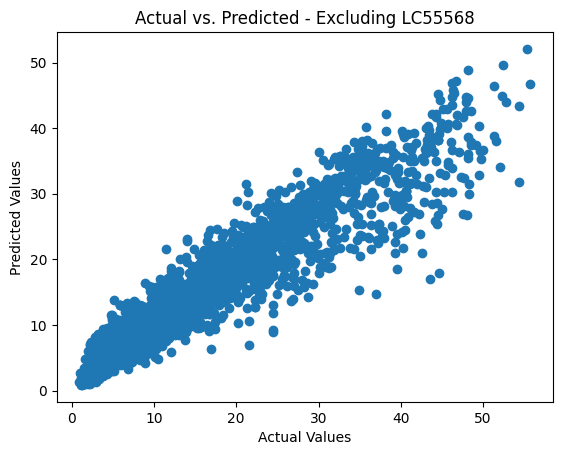

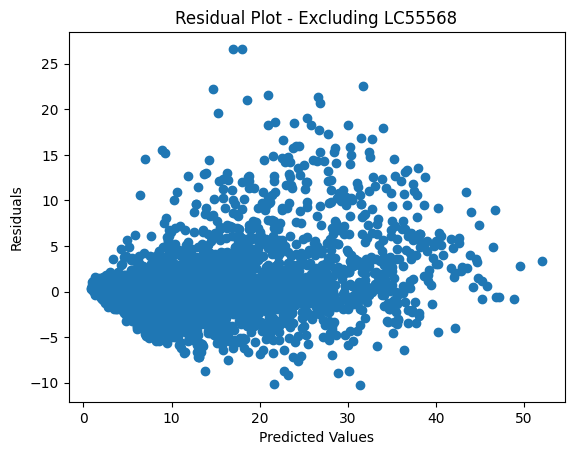

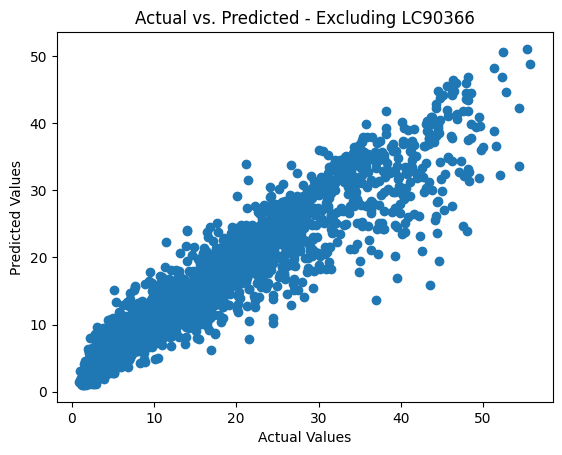

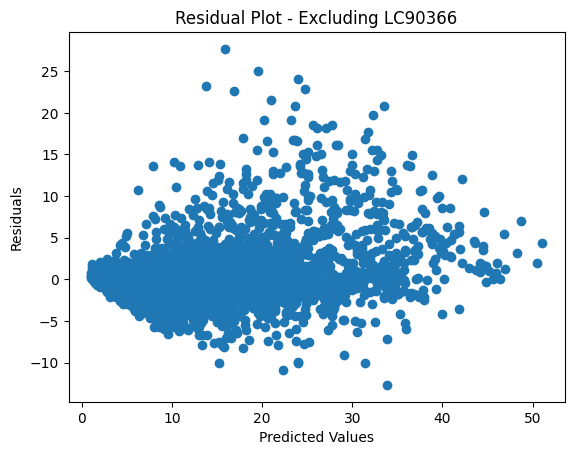

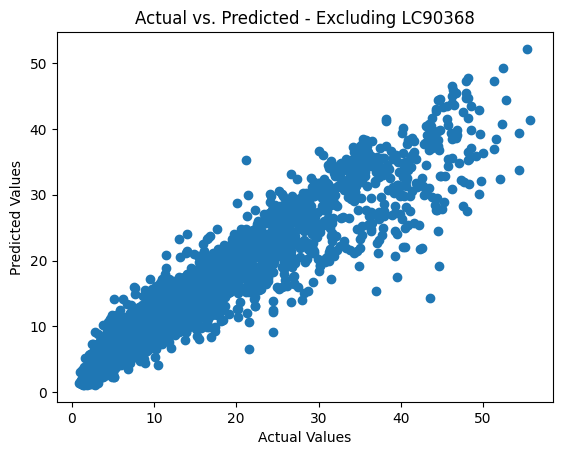

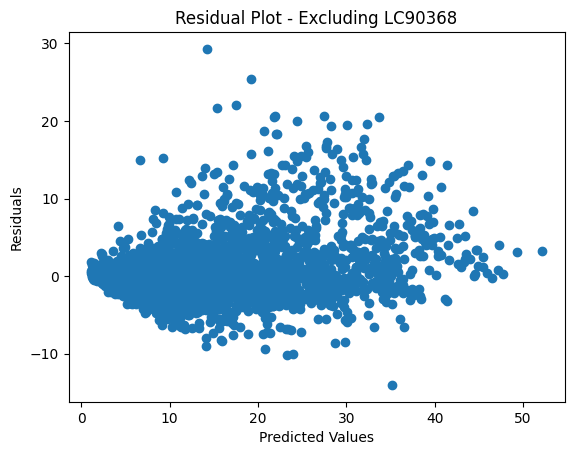

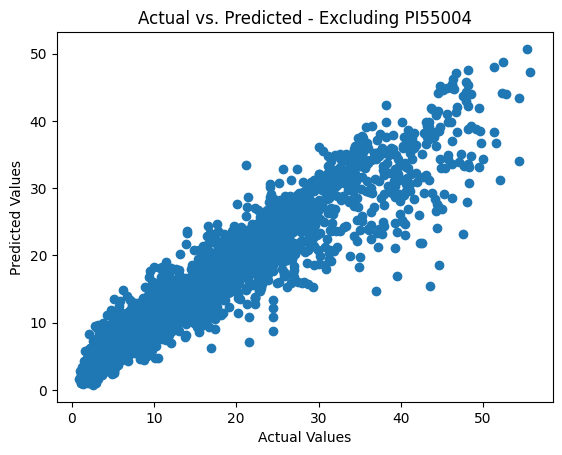

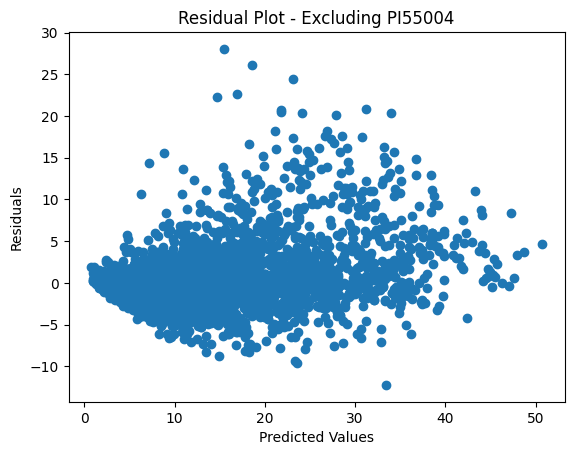

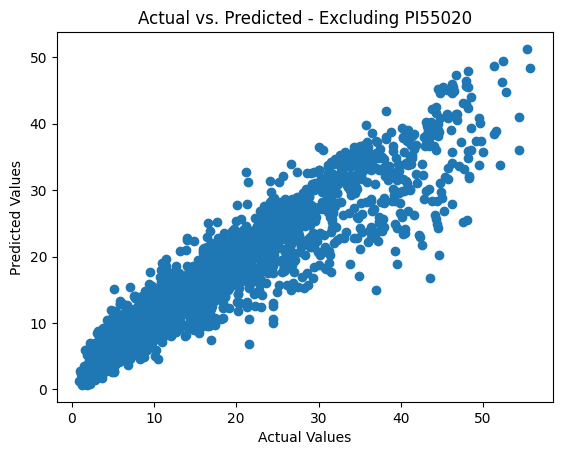

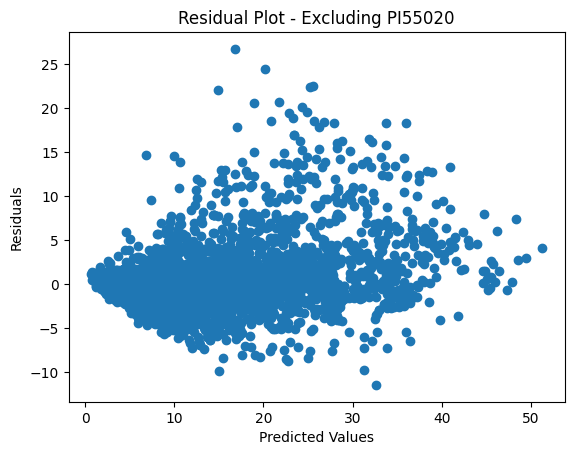

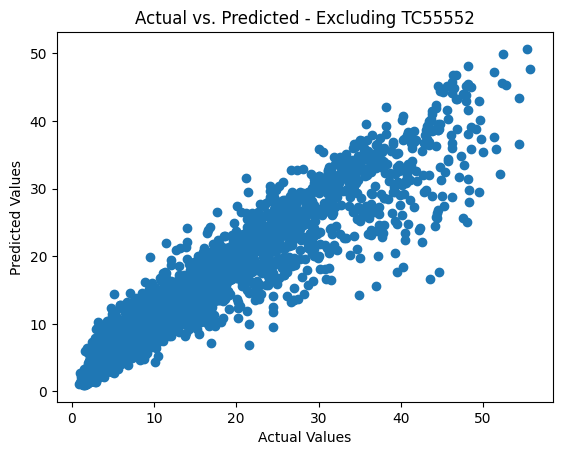

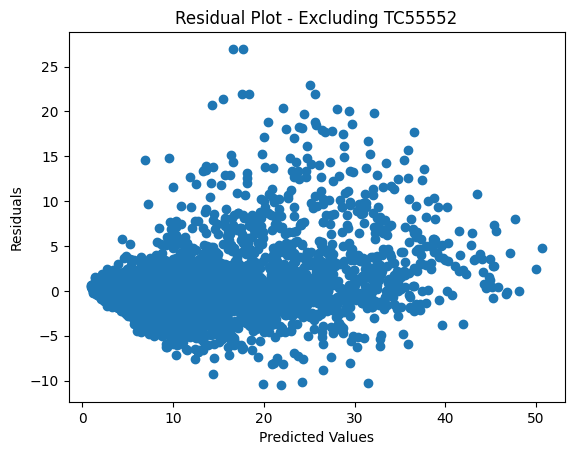

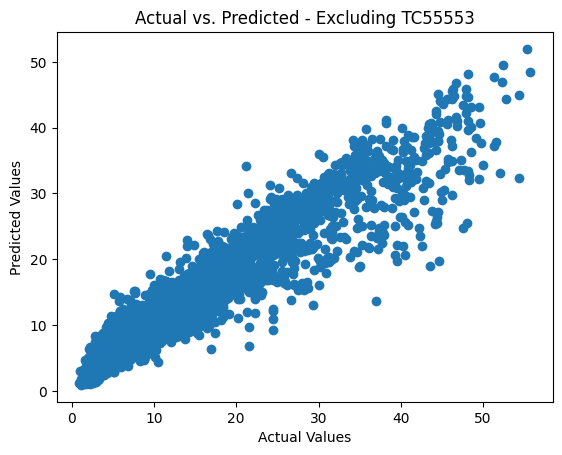

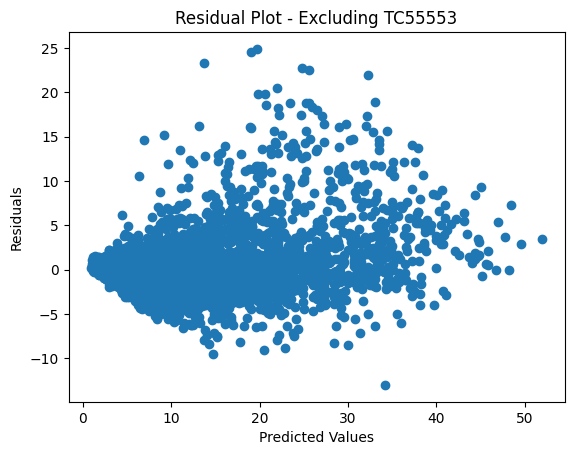

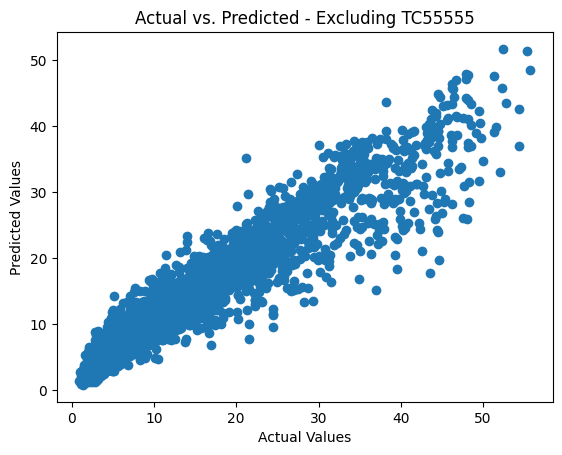

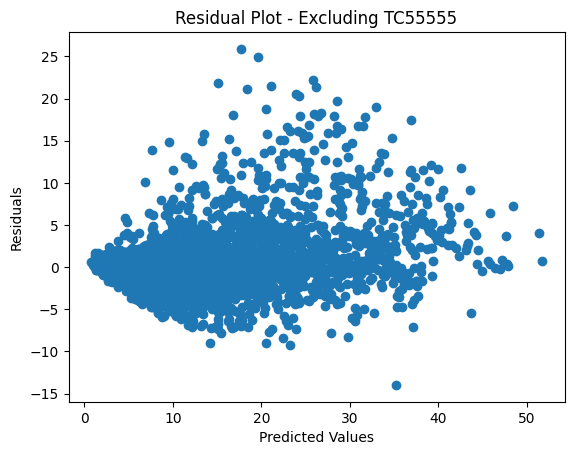

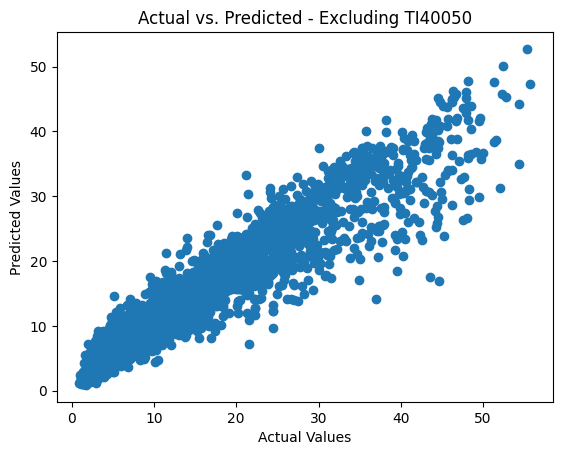

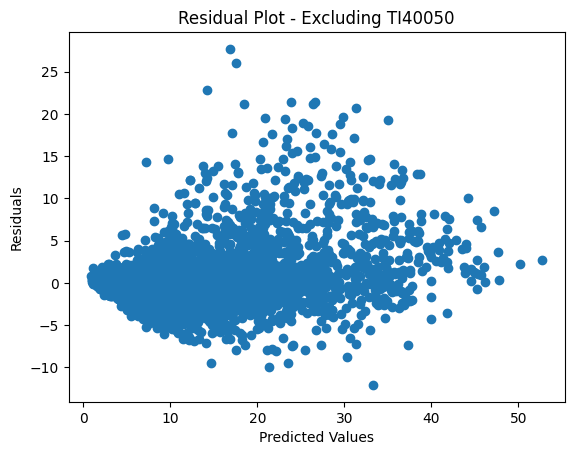

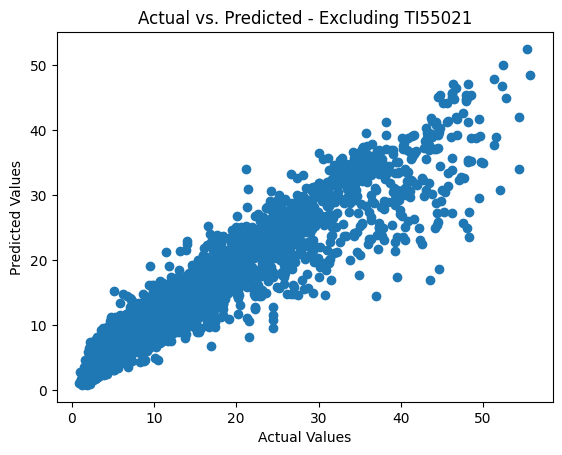

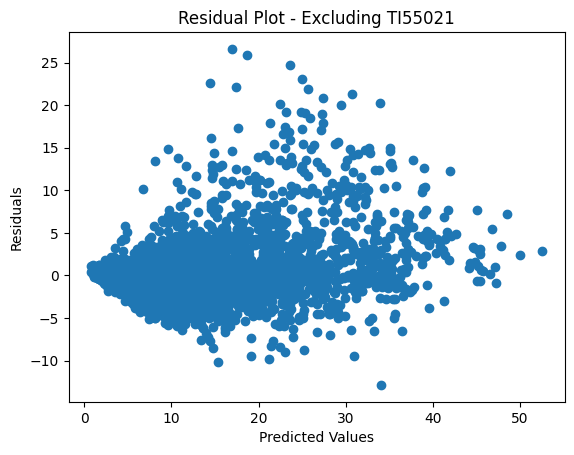

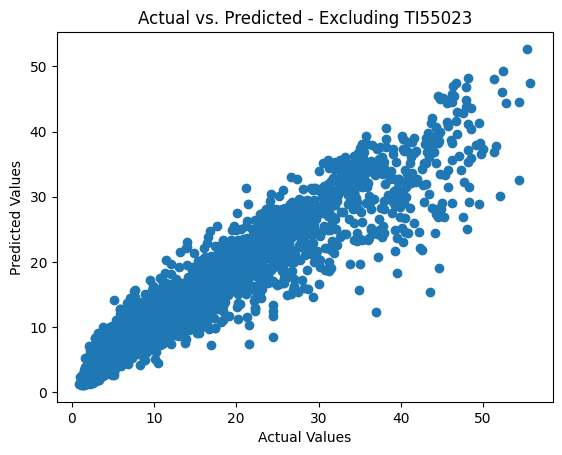

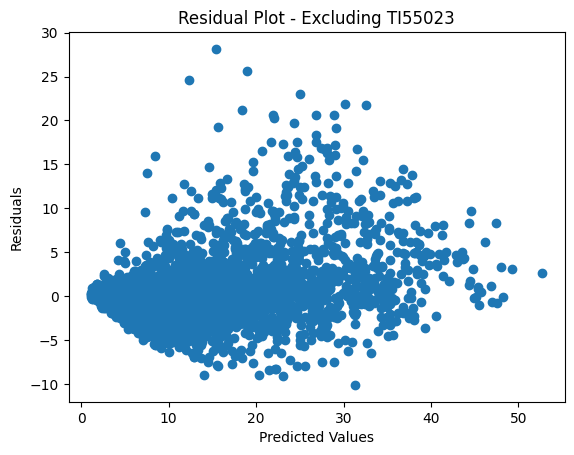

Feature Excluded: 425_pct_Al
MSE Train: 3.4099712458938756
RMSE Train: 1.8466107456347902
R2 Train: 0.9564272184339052
MSE Test: 6.533978072485252
RMSE Test: 2.556164719356961
R2 Test: 0.9147259885721847


Feature Excluded: Al2O3
MSE Train: 3.3592168532922435
RMSE Train: 1.8328166447553458
R2 Train: 0.9570757605777763
MSE Test: 6.4737172324002215
RMSE Test: 2.544350060899683
R2 Test: 0.9155124441600447


Feature Excluded: M_Value
MSE Train: 3.4327624535205836
RMSE Train: 1.8527715599934558
R2 Train: 0.9561359912533999
MSE Test: 6.553467961359292
RMSE Test: 2.5599742110730905
R2 Test: 0.9144716288256207


Feature Excluded: C4_pct_Eth
MSE Train: 3.468764110494391
RMSE Train: 1.8624618413525662
R2 Train: 0.9556759602964743
MSE Test: 6.576112966074747
RMSE Test: 2.5643932939537075
R2 Test: 0.9141760921143759


Feature Excluded: C4_pct_H2O
MSE Train: 3.354367261390178
RMSE Train: 1.8314931780899917
R2 Train: 0.9571377289034295
MSE Test: 6.454388358562125
RMSE Test: 2.540548830186526
R2 Test

In [21]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Butanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [22]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

                    MSE Train  RMSE Train  R2 Train  MSE Test  RMSE Test  \
425_pct_Al           3.409971    1.846611  0.956427  6.533978   2.556165   
Al2O3                3.359217    1.832817  0.957076  6.473717   2.544350   
M_Value              3.432762    1.852772  0.956136  6.553468   2.559974   
C4_pct_Eth           3.468764    1.862462  0.955676  6.576113   2.564393   
C4_pct_H2O           3.354367    1.831493  0.957138  6.454388   2.540549   
HydWtr_pct_Ammonia   3.567615    1.888813  0.954413  6.719234   2.592148   
C4_pct_Hex           3.427586    1.851374  0.956202  6.502574   2.550014   
HydWtr_Na2O          3.520187    1.876216  0.955019  6.508622   2.551200   
DI55102              3.315896    1.820960  0.957629  6.408517   2.531505   
DI55152              3.442497    1.855397  0.956012  6.481993   2.545976   
DI55580              3.533220    1.879686  0.954852  6.697446   2.587942   
FC55003              3.536091    1.880450  0.954816  6.743796   2.596882   
FC55552     

In [23]:
performance_df.to_csv('feature_test.csv', index=True)